In [227]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [155]:
# make qutip available in the rest of the notebook
from qutip import *

<h2>Get the spectrum of LMG<h2>

Hamiltonian of the LMG model: $H=-\lambda J_z - \frac{\Gamma}{N} J_x^2 = -\lambda J_z - \frac{\Gamma}{4N} (J_++J_-)^2$, QPT takes place for $\lambda=\Gamma$. We will fix the value of the external mag. field $\lambda=1$ and vary the interaction strength term $\Gamma$.

In [156]:
lam = 1.0  # mag. field
j=100#length of the spin chain
N=int(2*j)
dim=N+1

In [157]:
# operators
Jz=jmat(j,'z')
Jx=jmat(j,'x')
Jm=jmat(j,'-')
Jp=jmat(j,'+')

In [158]:
Hint=-Jx**2
#print(Hint)

In [159]:
H0=-Jz
#print(H0)

Let's check that we obtain a reasonable spectrum 

In [160]:
Gams=np.linspace(0,8,500)

In [161]:
E_results=np.zeros([len(Gams),int(dim/2)+1+1])
E_results[:,0]=Gams
ind=0
for Gam_i in Gams:
    H=H0+Gam_i/N*Hint
    H=Qobj(H[0::2,0::2]) #even parity
    [EigVal,EigVec]=H.eigenstates()
    E_results[ind,1:]=EigVal/N  #scaling!
    ind=ind+1

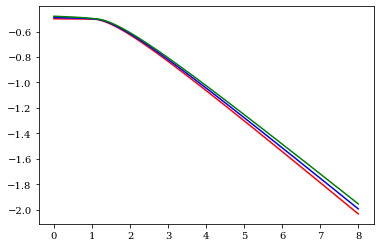

In [162]:
#check a few lines
plt.plot(E_results[:,0],E_results[:,1],'red')
plt.plot(E_results[:,0],E_results[:,2],'blue')
plt.plot(E_results[:,0],E_results[:,3],'green')

Text(0.5, 1.0, 'Spectrum of LMG (even parity sector)')

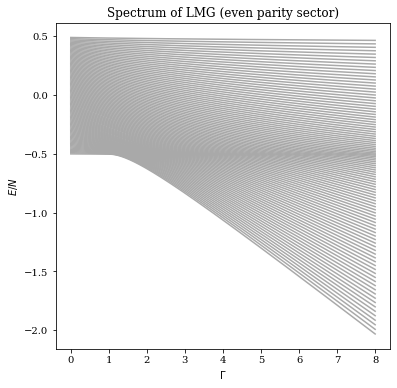

In [163]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))
for i in range(int(N/2)):
    axes.plot(E_results[:,0],E_results[:,i+1],color='darkgrey')
axes.set_xlabel('$\Gamma$')
axes.set_ylabel('$E/N$')
axes.set_title('Spectrum of LMG (even parity sector)')

<h2> Classical Hamiltonian <h2>

In the end, we want to observe the evolution in the phase space with standard $x,p$ coordinates. Therefore, as the first step, we apply Holstein-Primakoff transformation to get the bosonic realization of the model using creation/annihilation operators $a^\dagger, a$. These can be expressed as combinations of $x,p$ operators.

Holstein-Primakoff: $J_+=\sqrt{N} \sqrt{1-\frac{a^\dagger a}{N}}a$, $J_-=\sqrt{N} a^\dagger\sqrt{1-\frac{a^\dagger a}{N}}$, $J_z=\frac{N}{2}-a^\dagger a$.

After scalling the Hamiltonian $H \to \tilde{H}=H/N$ we use $\frac{a}{\sqrt{N}}=\frac{1}{\sqrt{2}}(x+ip)$, $\frac{a^\dagger}{\sqrt{N}}=\frac{1}{\sqrt{2}}(x-ip)$.

The new operators then have commutation relation $[x,p]=i/N$, so $N\to\infty$ limit makes the system effectively classical. So the operators $x,p$ become just standard commuting variables.

$\tilde{H}_{cl}=-\frac{\lambda}{2}+\frac{\lambda-\Gamma}{2}x^2+\frac{\Gamma}{4}x^4+\frac{\lambda}{2}p^2 +\frac{\Gamma}{4}p^2 x^2$.

In [164]:
# Make data.
G_plot=7.
X = np.linspace(-1.5, 1.5, 100)
P = np.linspace(-1.5, 1.5, 100)
X, P = np.meshgrid(X, P)
Hcl = -lam/2+(lam-G_plot)/2*X**2+G_plot/4*X**4+(lam/2)*P**2+(G_plot/4)*P**2*X**2

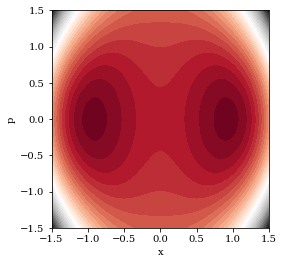

In [165]:
#2d version
Hcl_2d = Hcl.reshape(len(X), len(P))
plt.contourf(X, P, Hcl_2d,35, cmap='RdGy')
plt.xlabel('x')
plt.ylabel('p')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Cut at $p=0$

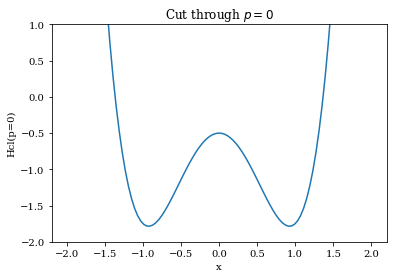

In [166]:
x1 = np.linspace(-2, 2, 100)
Vcl=-lam/2+(lam-G_plot)/2*x1**2+G_plot/4*x1**4
fig, ax = plt.subplots()
ax.plot(x1, Vcl)

ax.set_ylim(-2,1)
ax.set(xlabel='x', ylabel='Hcl(p=0)', title='Cut through $p=0$')
#ax.grid()
plt.show()

Analytic evolution of the g.s. from the classical theory: 
$E_{min}=-\frac{\lambda}{2}$ if $\Gamma<\lambda$,
$E_{min}=-\frac{\lambda}{2}-\frac{(\lambda-\Gamma)^2}{4\Gamma}$ if $\Gamma>\lambda$.

Sanity check with numerics:

In [167]:
# Emin from analytical expression from Gamma=5
G_ini=7.
Emin_anal=-lam/2-(lam-G_ini)**2/(4*G_ini)
print('Emin analytical:', Emin_anal)

Emin analytical: -1.7857142857142858


In [168]:
H=(H0+G_ini/N*Hint)/N #scale! 
#H=Qobj(H[0::2,0::2]) #even parity
[EigVal,EigVec]=H.eigenstates()
Emin_num=EigVal[0] 
print('Emin numerical:', Emin_num)

Emin numerical: -1.785894698668309


<h2> Wigner function of the ini state for backquench <h2>

In [169]:
gs_vec=EigVec[1] #want to take the even parity gs! weird sorting
rho_gs=gs_vec*gs_vec.dag()
rho_gs.tr() #check that the trace is 1

0.9999999999972164

In [170]:
gs_vec[38:40]

array([[ 1.22095839e-06+0.j],
       [-2.69506068e-11+0.j]])

In [171]:
EigVal[0:2]

array([-1.7858947, -1.7858947])

In [172]:
xvec = np.linspace(-16,16,200)
yvec = np.linspace(-10,10,200)

In [173]:
W_gs = wigner(rho_gs, xvec, yvec)

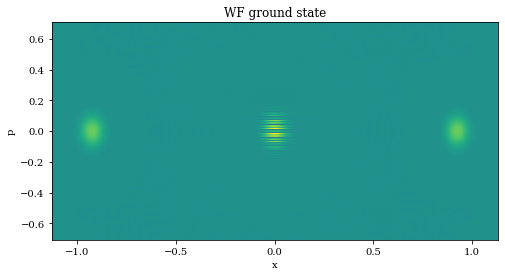

In [174]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))
cont0 = axes.contourf(xvec/np.sqrt(N), yvec/np.sqrt(N), W_gs, 200) #scaling
lbl0 = axes.set_title("WF ground state")
axes.set_xlabel('x')
axes.set_ylabel('p')
plt.show()

We start then with a coherent superpositon of two states placed in the two minima.

To **tune up the parameters of the quench**, say we fix $\Gamma_i=5$, $E_i$ is then the respective ground state energy. After the rapid change of the control parameter to $\Gamma_f$, the initial state will be distributed in the final basis while centered at $\langle E_f \rangle _i=E_i + (\Gamma_f-\Gamma_i)\frac{dE}{d\Gamma}|_{\Gamma=\Gamma_i}$.

In [175]:
Ei=Emin_num

In [176]:
Efi=-0.5 #want to hit ESQPT

In [177]:
dEidGam=(lam-G_ini)/(2*G_ini)+(lam-G_ini)**2/(4*G_ini**2)
dEidGam

-0.24489795918367344

In [178]:
#critical final G_fin
G_fin=(Efi-Ei)/dEidGam+G_ini
G_fin

1.7492633137710705

So, let's say we perform three quenches: $\Gamma_f=2.5,\ \ 1.74926,\ \ 0.8$.

<h2> Strength functions   <h2>

In [179]:
gs_vec=np.real(np.asarray(gs_vec[0::2])) #initial state, even parity only
Gam_fs=[0.8,1.74926,2.5]

In [180]:
len(gs_vec)

101

0.999999999841668
0.9999999998416668
0.9999999998416608


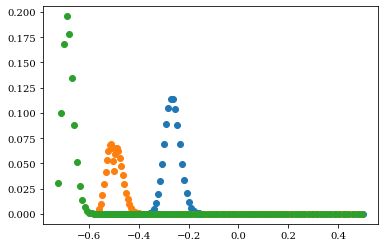

In [181]:
E_vs_C=np.zeros([len(gs_vec),2]) #store E vs strength given as |C|^2 where C is the overlap
for Gam_fi in Gam_fs:
    H=(H0+Gam_fi/N*Hint)/N #scale! 
    H=H[0::2,0::2]
    [EigVal_f,EigVec_f]=np.linalg.eig(H)     
    E_vs_C[:,0]=np.real(EigVal_f)
    E_vs_C[:,1]=np.matmul(np.transpose(gs_vec),np.real(EigVec_f))
    #only even parity sector
    print(np.sum(E_vs_C[:,1]**2))
    plt.plot(E_vs_C[:,0],E_vs_C[:,1]**2,'o') #plot to rough check
    np.savetxt('E_vs_C_even'+ str(Gam_fi) + '.txt', E_vs_C)

<h3> First plot: phase diag and strength functions <h3>

In [182]:
0.245*6.2-1.785 #mean of the non-critical

-0.266

In [183]:
0.266-1.785 #shift in y val

-1.519

<h2> Survival probability  <h2> 

In [184]:
Gam_fi=0.8
with open('E_vs_C_even'+ str(Gam_fi) + '.txt') as f:
    lines = f.readlines()
    C_long = [float(line.split()[1]) for line in lines] #long backward jump
    E_long = [float(line.split()[0]) for line in lines]

In [185]:
time=np.linspace(0.0001,10000,10000)
C2_long =np.abs(np.asarray(C_long))**2

In [186]:
P_long=[]
for ti in time:
    exps=np.exp(1j*np.asarray(E_long)*ti)
    P_long.append(abs(sum(C2_long*exps))**2)
P_long=np.asarray(P_long)  

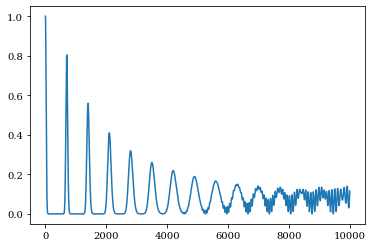

In [187]:
#rough check
plt.plot(time ,P_long)
plt.show()

/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


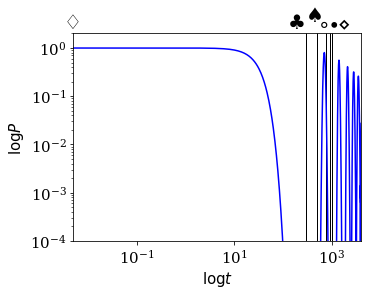

In [199]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}

plt.matplotlib.rc('font', **font)
# plt.subplots_adjust(wspace=0.05)
fig1a = plt.figure(constrained_layout=True,figsize=(5,4))
widths = [1]
heights =[1]
#gs = fig5.add_gridspec(1, 6)
spec5b = fig1a.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)

ax0 = fig1a.add_subplot(spec5b[0, 0])
ax0.plot(time,P_long,color='blue')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylim(1e-4, 2)
ax0.set_xlim(0.005, 4000)
ax0.set_xlabel(r'$\log{t}$')
ax0.set_ylabel(r'$\log{P}$')

tlist=[300,500,750,900,1000]
for t in tlist:
    ax0.arrow(t, 2, 0, -2, length_includes_head=True,head_width=0.0, head_length=0,color='black',ls='--',width=0.0005)

labely1=[r'$\diamondsuit$',r'$\clubsuit$',r'$\spadesuit$',r'$\circ$',r'$\bullet$',r'$\diamond$']
ax0.text(0.003,2.5, labely1[0], fontsize=20)
ax0.text(120,2.5, labely1[1], fontsize=20)
ax0.text(280,3.5, labely1[2], fontsize=20)
ax0.text(500,2.5, labely1[3], fontsize=20)
ax0.text(800,2.5, labely1[4], fontsize=20)
ax0.text(1300,2.4, labely1[5], fontsize=20)

#fig5b.tight_layout()
fig1a.show()

In [247]:
fig1a.savefig('Evo_noncrit.pdf', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [191]:
Gam_fi=1.74926
with open('E_vs_C_even'+ str(Gam_fi) + '.txt') as f:
    lines = f.readlines()
    C_crit = [float(line.split()[1]) for line in lines] #crit backward jump
    E_crit = [float(line.split()[0]) for line in lines]

In [192]:
C2_crit =np.abs(np.asarray(C_crit))**2
P_crit=[]
for ti in time:
    exps=np.exp(1j*np.asarray(E_crit)*ti)
    P_crit.append(abs(sum(C2_crit*exps))**2)
P_crit=np.asarray(P_crit) 

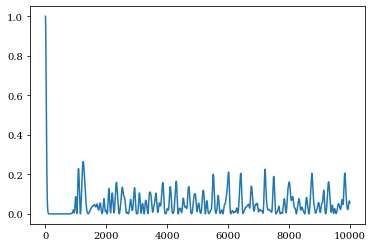

In [193]:
#rough check
plt.plot(time ,P_crit)
plt.show()

/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


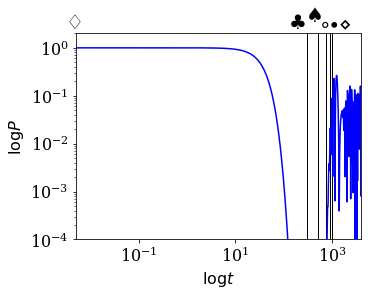

In [198]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.matplotlib.rc('font', **font)
# plt.subplots_adjust(wspace=0.05)
fig2a = plt.figure(constrained_layout=True,figsize=(5,4))
widths = [1]
heights =[1]
#gs = fig5.add_gridspec(1, 6)
spec5b = fig2a.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)

ax0 = fig2a.add_subplot(spec5b[0, 0])
ax0.plot(time,P_crit,color='blue')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylim(1e-4, 2)
ax0.set_xlim(0.005, 4000)
ax0.set_xlabel(r'$\log{t}$')
ax0.set_ylabel(r'$\log{P}$')

tlist=[300,500,750,900,1000]
for t in tlist:
    ax0.arrow(t, 2, 0, -2, length_includes_head=True,head_width=0.0, head_length=0,color='black',ls='--',width=0.0005)

labely1=[r'$\diamondsuit$',r'$\clubsuit$',r'$\spadesuit$',r'$\circ$',r'$\bullet$',r'$\diamond$']
ax0.text(0.003,2.5, labely1[0], fontsize=20)
ax0.text(120,2.5, labely1[1], fontsize=20)
ax0.text(280,3.5, labely1[2], fontsize=20)
ax0.text(500,2.5, labely1[3], fontsize=20)
ax0.text(800,2.5, labely1[4], fontsize=20)
ax0.text(1300,2.4, labely1[5], fontsize=20)

#fig5b.tight_layout()
fig2a.show()

In [246]:
fig2a.savefig('Evo_crit.pdf', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


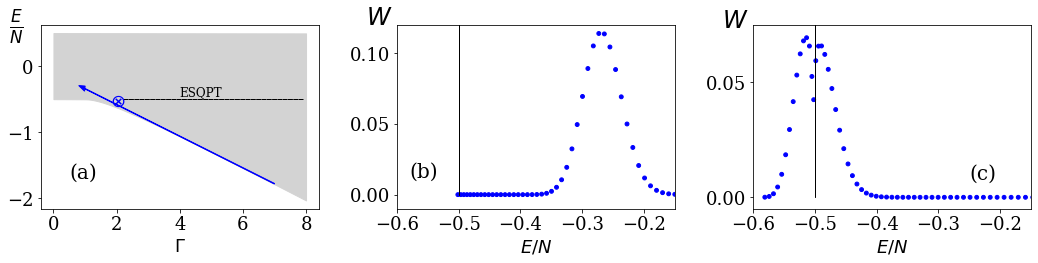

In [90]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

plt.matplotlib.rc('font', **font)
# plt.subplots_adjust(wspace=0.05)
fig5b = plt.figure(constrained_layout=True,figsize=(15,4))
widths = [1,1,1]
heights =[1]
#gs = fig5.add_gridspec(1, 6)
spec5b = fig5b.add_gridspec(ncols=3, nrows=1, width_ratios=widths,
                          height_ratios=heights)

ax0 = fig5b.add_subplot(spec5b[0, 0])
#ax0.plot(E_results[:,0],E_results[:,1],color='lightgrey')
#ax0.plot(E_results[:,0],E_results[:,-1],color='lightgrey')
ax0.fill_between(E_results[:,0],E_results[:,1],E_results[:,-1],color='lightgrey')
ax0.set_xlabel(r'$\Gamma$')
#ax0.set_title('$E/N$')
ax0.arrow(7, -1.784+0.005, -6.2, 1.48+0.005, length_includes_head=True,head_width=0.08, head_length=0.2,color='blue',width=0.008,visible=True)
ax0.text(1.785,-0.5-0.11, r'$\otimes$',color='blue')
ax0.arrow(2.2, -0.5, 5.7, 0, length_includes_head=True,head_width=0.0, head_length=0,color='black',ls='--',width=0.0005)
#ax0.arrow(7, -1.785, -5.25, 1.25, length_includes_head=True,head_width=0.08, head_length=0.2,color='blue')
ax0.text(4,-0.45, r'ESQPT', fontsize=12)


ax1 = fig5b.add_subplot(spec5b[0, 1])
#ax1.plot(E_long ,C2_long,'o', color='blue', label=r'$P_{\rm qm}$')
s=[15]*len(C2_crit)
ax1.scatter(E_long ,C2_long,color='blue',s=s)
ax1.set_xlabel(r'$E/N$')
#ax1.set_title('$W$')
ax1.set_xlim(-0.6, -0.15)
ax1.set_ylim(-0.01, 0.12)
ax1.arrow(-0.5, 0, 0, 0.12, length_includes_head=True,head_width=0.0, head_length=0,color='black',ls='--',width=0.0005)


ax2 = fig5b.add_subplot(spec5b[0, 2])
#ax2.plot(E_crit ,C2_crit,'o', color='blue', label=r'$P_{\rm qm}$')
s=[15]*len(C2_crit)
ax2.scatter(E_crit ,C2_crit,color='blue',s=s)
ax2.set_xlabel(r'$E/N$')
#ax2.set_title('$W$')
ax2.set_xlim(-0.6, -0.15)
ax2.set_ylim(-0.005, 0.075)
ax2.set_yticks([0,0.05])
ax2.arrow(-0.5, 0, 0, 0.12, length_includes_head=True,head_width=0.0, head_length=0,color='black',ls='--',width=0.0005)


ax0.text(-1.4,0.5, r'$\frac{E}{N}$', fontsize=24)
ax1.text(-0.65,0.12, r'$W$', fontsize=24)
ax2.text(-0.65,0.074, r'$W$', fontsize=24)

ax0.text(0.5,-1.7, r'(a)', fontsize=20)
ax1.text(-0.58,0.012, r'(b)', fontsize=20)
ax2.text(-0.25,0.008, r'(c)', fontsize=20)



fig5b.tight_layout()
fig5b.show()

In [91]:
fig5b.savefig('Sketch_and_Strength.pdf', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [39]:
Gam_fi=2.5
with open('E_vs_C_even'+ str(Gam_fi) + '.txt') as f:
    lines = f.readlines()
    C_short = [float(line.split()[1]) for line in lines] #short backward jump
    E_short = [float(line.split()[0]) for line in lines]

In [40]:
C2_short=np.abs(np.asarray(C_short))**2
P_short=[]
for ti in time:
    exps=np.exp(1j*np.asarray(E_short)*ti)
    P_short.append(abs(sum(C2_short*exps))**2)
P_short=np.asarray(P_short) 

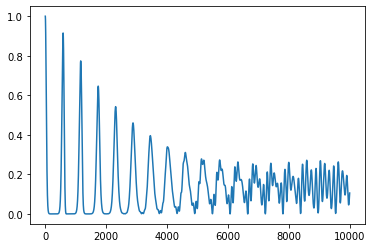

In [39]:
#rough check
plt.plot(time ,P_short)
plt.show()

<h2> Wigner functions at snap shots <h2>
 <h3> Critical case <h3>

In [202]:
t_max=2000
tlist=[0.0,300,500,750,900,1000]
Gam=1.74926

In [203]:
rho_ini=rho_gs
H=(H0+Gam/N*Hint)/N

In [204]:
#quatnum dynamics using mesolve from qutip package
options=Options()
options.store_states='True'
options.nsteps=1000
#options.atol=1e-13 #abs tol
#options.rtol=1e-12 #rel tolerance
result = mesolve(H, rho_ini, tlist, [], H,options=options)

In [205]:
len(result.states)

6

In [206]:
result.states[-1].tr() #check unit trace

0.999999999997215

In [207]:
xvec = np.linspace(-16,16,500)
yvec = np.linspace(-10,10,500)
WF_list=[]
for i in range(len(result.states)):
    rho=result.states[i]
    WF=wigner(rho, xvec, yvec)
    WF_list.append(WF)
    

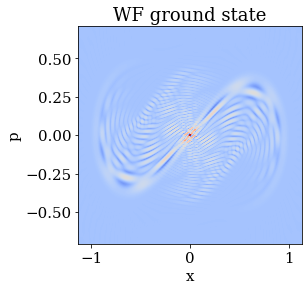

In [208]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))
cont0 = axes.contourf(xvec/np.sqrt(N), yvec/np.sqrt(N), WF_list[-1], 500,cmap='coolwarm') #scaling
lbl0 = axes.set_title("WF ground state")
axes.set_xlabel('x')
axes.set_ylabel('p')
plt.show()

In [209]:
mins=[]
maxs=[]
for WF in WF_list:
    mins.append(np.amin(np.array(WF)))
    maxs.append(np.amax(np.array(WF)))

In [210]:
v_min=min(mins)
v_max=max(maxs)
print(min(mins))
print(max(maxs))

-0.30964675278545434
0.3169268770522937


In [211]:
from mpl_toolkits.axes_grid1 import AxesGrid

In [212]:
W_plot=[WF_list[0],WF_list[1],WF_list[2],WF_list[3],WF_list[4],WF_list[5]]
labely=[r'$\diamondsuit$',r'$\clubsuit$',r'$\spadesuit$',r'$\circ$',r'$\bullet$',r'$\diamond$']

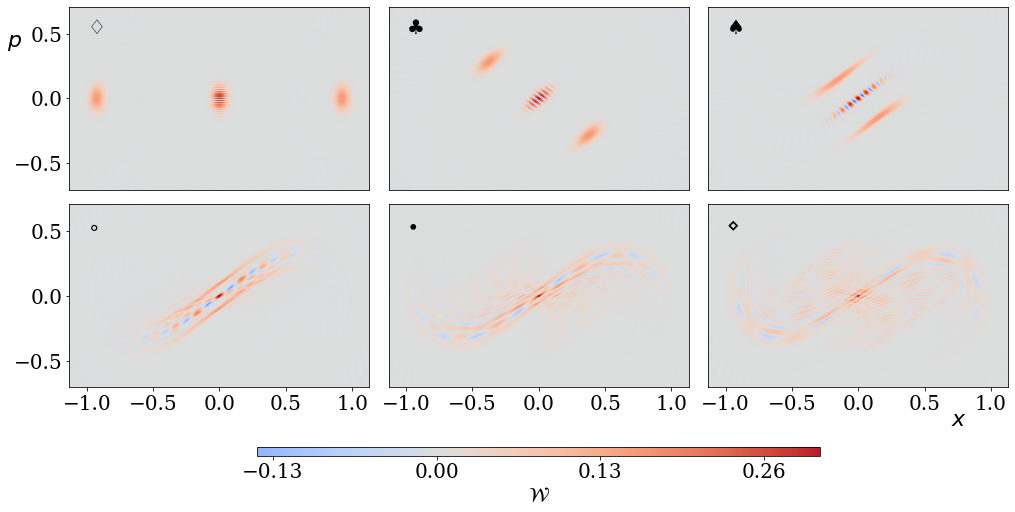

In [266]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}
plt.matplotlib.rc('font', **font)
fig1, axs = plt.subplots(2, 3, constrained_layout=True,figsize=(14,7))
index=0

for ax in axs.flat:
    pcm = ax.contourf(xvec/np.sqrt(N), yvec/np.sqrt(N), W_plot[index], 200,cmap='coolwarm',vmin=v_min,vmax=v_max)
  ##  ax.set(xlabel=r'$x$')
  #  ax.set(ylabel=r'$p$')
    if index == 0:
        ax.set_xticks([])
    elif index == 1 or index == 2:
        ax.set_xticks([])
        ax.set_yticks([])
    elif index == 4 or index == 5:
        ax.set_yticks([])
    
    ax.text(-1.0,0.5, labely[index], fontsize=20)
    index+=1

#fig.colorbar(pcm, ax=axs[:, :], location='right', shrink=0.6, ticks=[-0.13, 0, 0.13,0.26],label=r'$\mathcal{W}$')
fig1.colorbar(pcm, ax=axs[:, :], shrink=0.6, ticks=[-0.13, 0, 0.13,0.26],orientation='horizontal',label=r'$\mathcal{W}$')

axs.flat[0].text(-1.6,0.4, r'$p$', fontsize=22)
axs.flat[5].text(0.7,-1, r'$x$', fontsize=22)


plt.show()

In [261]:
fig1.savefig('WF_LMG_Backward_Crit.pdf', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [260]:
fig1.savefig('WF_LMG_Backward_Crit.png')

In [179]:
#useful example
fig, axs = plt.subplots(2, 2)
cm = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cm[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)
plt.show()

<h3> non-critical case <h3>

In [249]:
Gam_non=0.8

In [250]:
rho_ini=rho_gs
H_non=(H0+Gam_non/N*Hint)/N

In [251]:
#quatnum dynamics using mesolve from qutip package
options=Options()
options.store_states='True'
options.nsteps=1000
#options.atol=1e-13 #abs tol
#options.rtol=1e-12 #rel tolerance
result = mesolve(H_non, rho_ini, tlist, [], H_non,options=options)

In [252]:
result.states[-1].tr() #check unit trace

0.9999999999972157

In [253]:
xvec = np.linspace(-16,16,500)
yvec = np.linspace(-10,10,500)
WF_list_non=[]
for i in range(len(result.states)):
    rho=result.states[i]
    WF=wigner(rho, xvec, yvec)
    WF_list_non.append(WF)
    

In [254]:
mins_non=[]
maxs_non=[]
for WF in WF_list_non:
    mins_non.append(np.amin(np.array(WF)))
    maxs_non.append(np.amax(np.array(WF)))

In [255]:
v_min_non=min(mins_non)
v_max_non=max(maxs_non)

In [257]:
W_plot_non=[WF_list_non[0],WF_list_non[1],WF_list_non[2],WF_list_non[3],WF_list_non[4],WF_list_non[5]]

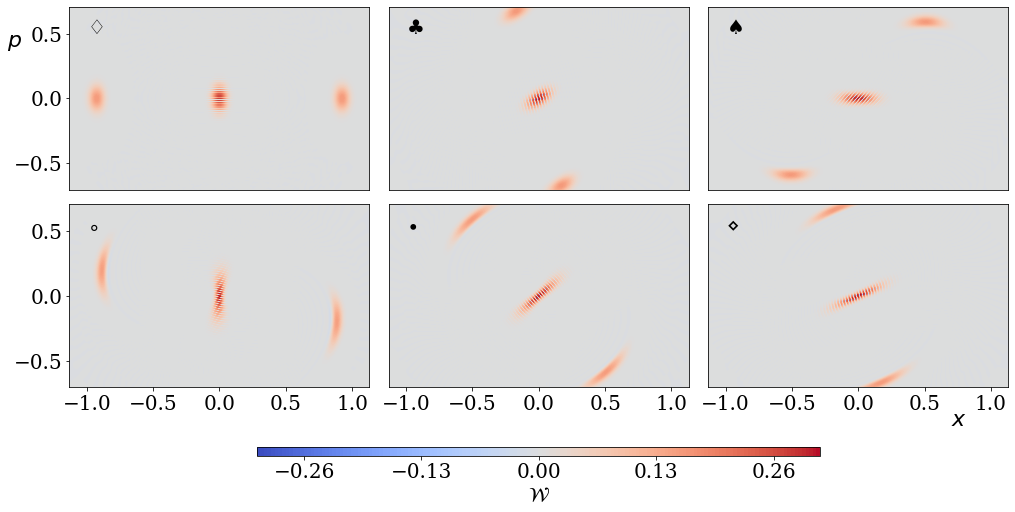

In [267]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}
plt.matplotlib.rc('font', **font)
fig2, axs = plt.subplots(2, 3, constrained_layout=True,figsize=(14,7))
index=0

for ax in axs.flat:
    pcm = ax.contourf(xvec/np.sqrt(N), yvec/np.sqrt(N), W_plot_non[index], 200,cmap='coolwarm',vmin=v_min,vmax=v_max)
  ##  ax.set(xlabel=r'$x$')
  #  ax.set(ylabel=r'$p$')
    if index == 0:
        ax.set_xticks([])
    elif index == 1 or index == 2:
        ax.set_xticks([])
        ax.set_yticks([])
    elif index == 4 or index == 5:
        ax.set_yticks([])
    
    ax.text(-1.0,0.5, labely[index], fontsize=20)
    index+=1

#fig.colorbar(pcm, ax=axs[:, :], location='right', shrink=0.6, ticks=[-0.13, 0, 0.13,0.26],label=r'$\mathcal{W}$')
fig2.colorbar(pcm, ax=axs[:, :], shrink=0.6, ticks=[-0.26,-0.13, 0, 0.13,0.26],orientation='horizontal',label=r'$\mathcal{W}$')

axs.flat[0].text(-1.6,0.4, r'$p$', fontsize=22)
axs.flat[5].text(0.7,-1, r'$x$', fontsize=22)


plt.show()




In [264]:
fig2.savefig('WF_LMG_Backward_NonCrit.pdf', dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [265]:
fig2.savefig('WF_LMG_Backward_NonCrit.png')

<h3> second non-critical case <h3>

In [228]:
Gam_non2=2.5

In [234]:
rho_ini=rho_gs
H_non2=(H0+Gam_non2/N*Hint)/N

In [235]:
result.states[-1].tr() #check unit trace

0.999999999997216

In [236]:
xvec = np.linspace(-16,16,500)
yvec = np.linspace(-10,10,500)
WF_list_non2=[]
for i in range(len(result.states)):
    rho=result.states[i]
    WF=wigner(rho, xvec, yvec)
    WF_list_non2.append(WF)
    